# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
data = pd.read_csv('Employee.csv')

data

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


1. Con pivot table

In [3]:
pivot_table = data.pivot_table(index='Department', values='Salary', aggfunc='mean')

pivot_table

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


1. Sin pivot table

In [4]:
mean_dep_salary = data.groupby('Department')['Salary'].mean()

mean_dep_salary

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [5]:
pivot_table2 = data.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc='mean')

pivot_table2

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:

pivot_table = data.pivot_table(index=['Title', 'Years'], values='Salary').reset_index()

pivot_table


,Title,Years,Salary
0,VP,8,70
1,analyst,1,35
2,analyst,2,30
3,analyst,4,35
4,associate,2,55
5,associate,3,55
6,associate,7,60


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [9]:
pivot_table = data.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc={'Salary': 'mean', 'Title': 'count'})


pivot_table

Salary  Title
Department Title                   
HR         VP           70.0      1
           analyst      32.5      2
IT         VP           70.0      1
           analyst      32.5      2
           associate    60.0      1
Sales      associate    55.0      2

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [15]:
pivot_table = data.pivot_table(index =['Department', 'Title'], values ='Salary', aggfunc = {'Salary': ['median', 'min', 'max', 'std']}).reset_index()

pivot_table.columns = ['Department', 'Title', 'Median Salary', 'Min Salary', 'Max Salary', 'Std Dev Salary']

pivot_table

,Department,Title,Median Salary,Min Salary,Max Salary,Std Dev Salary
0,HR,VP,70,70.0,70,NaN
1,HR,analyst,35,32.5,30,3.535534
2,IT,VP,70,70.0,70,NaN
3,IT,analyst,35,32.5,30,3.535534
4,IT,associate,60,60.0,60,NaN
5,Sales,associate,55,55.0,55,0.000000


En el Index se establecen 'Department' y 'Title' como columnas de índice para la tabla dinámica.

values = 'Salary': Indica que se calcularán las estadísticas (mediana, mínimo, máximo y desviación estándar) sobre la columna de salario.

aggfunc = {'Salary': ['median', 'min', 'max', 'std']}: Utilizamos un diccionario para especificar las estadísticas que queremos calcular.

#### Based on your comments, fill the missing values with an appropriate value

La desviación estándar: llenamos los valores NaN en la desviación estándar con cero, ya que la dispersión de los datos, es nula en estos casos. 

In [20]:
pivot_table = data.pivot_table(index =['Department', 'Title'], values ='Salary', aggfunc = {'Salary': ['median', 'min', 'max', 'std']}).reset_index()

pivot_table.columns = ['Department', 'Title', 'Median Salary', 'Min Salary', 'Max Salary', 'Std Dev Salary']

pivot_table

,Department,Title,Median Salary,Min Salary,Max Salary,Std Dev Salary
0,HR,VP,70,70.0,70,NaN
1,HR,analyst,35,32.5,30,3.535534
2,IT,VP,70,70.0,70,NaN
3,IT,analyst,35,32.5,30,3.535534
4,IT,associate,60,60.0,60,NaN
5,Sales,associate,55,55.0,55,0.000000


In [22]:
pivot_table.fillna(0, inplace=True)

pivot_table

,Department,Title,Median Salary,Min Salary,Max Salary,Std Dev Salary
0,HR,VP,70,70.0,70,0.000000
1,HR,analyst,35,32.5,30,3.535534
2,IT,VP,70,70.0,70,0.000000
3,IT,analyst,35,32.5,30,3.535534
4,IT,associate,60,60.0,60,0.000000
5,Sales,associate,55,55.0,55,0.000000


#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [24]:
pivot_table = data.pivot_table(index='Department', values='Salary', aggfunc={'Salary': ['count', 'sum']})

pivot_table.columns = ['Number of Employees', 'Total Salary Expense']

pivot_table

,Number of Employees,Total Salary Expense
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [35]:

pivot_table = data.pivot_table(index=['Department', 'Title'], values=['Years', 'Salary'],aggfunc = {'Years': 'sum', 'Salary': 'mean'})

pivot_table.columns = ['Years_of_Experience', 'salary_mean']

pivot_table.reset_index()

,Department,Title,Years_of_Experience,salary_mean
0,HR,VP,70.0,8
1,HR,analyst,32.5,6
2,IT,VP,70.0,8
3,IT,analyst,32.5,3
4,IT,associate,60.0,7
5,Sales,associate,55.0,5


#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [43]:
def no_max_salary(salaries):
    max_salary = salaries.max()
    return salaries[salaries < max_salary].mean()

In [44]:
pivot_table = data.pivot_table(index='Department', values='Salary', aggfunc=no_max_salary).reset_index()


pivot_table.columns = ['Department', 'Mean Salary Without Max']


pivot_table


,Department,Mean Salary Without Max
0,HR,32.500000
1,IT,41.666667


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [45]:
fitbit = pd.read_csv('Fitbit.csv')

fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [48]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [49]:
type(fitbit)

pandas.core.frame.DataFrame

In [47]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [50]:
 import matplotlib.pyplot as plt

In [54]:
from scipy.stats import pearsonr, spearmanr

In [55]:
import seaborn as sns

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

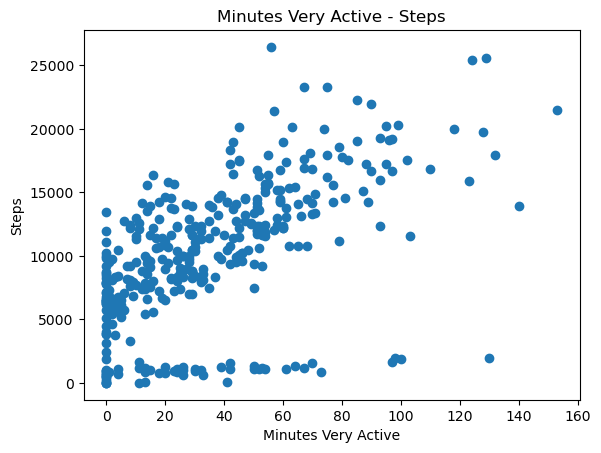

In [53]:
plt.scatter(fitbit["Minutes Very Active"], fitbit["Steps"])
plt.title("Minutes Very Active - Steps")
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")
plt.show()

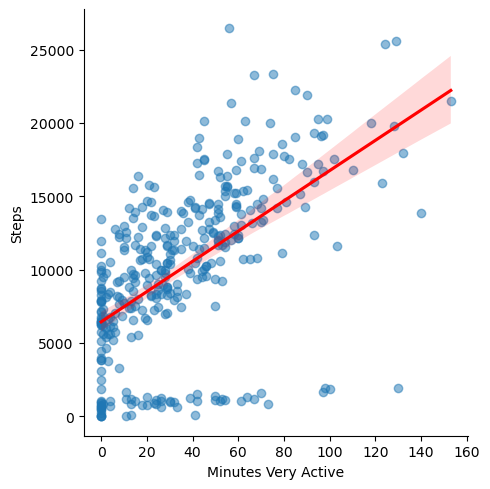

In [62]:

corr = fitbit["Minutes Very Active"].corr(fitbit["Steps"])

sns.lmplot(x="Minutes Very Active", y="Steps", data=fitbit, line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})

plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

- Tienen una correlación lineal, ya que a medida que aumentan los Steps, es habitual que aumenten los minutos activo. Sin embargo, hay personas que parece que se mantienen activas, sin embargo, el número de pasos apenas se mueve, pueden ser personas mayores, por ejemplo.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [66]:
correlation_sd = fitbit["Minutes Sedentary"].corr(fitbit["Steps"])
correlation_sd

0.0769060806299009

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

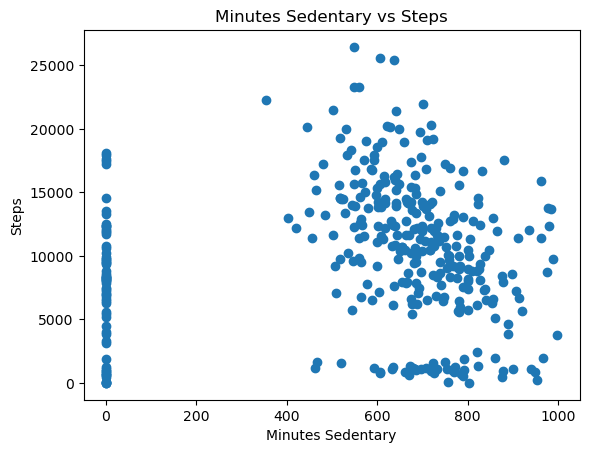

In [64]:
plt.scatter(fitbit["Minutes Sedentary"], fitbit["Steps"])
plt.title("Minutes Sedentary vs Steps")
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")
plt.show()

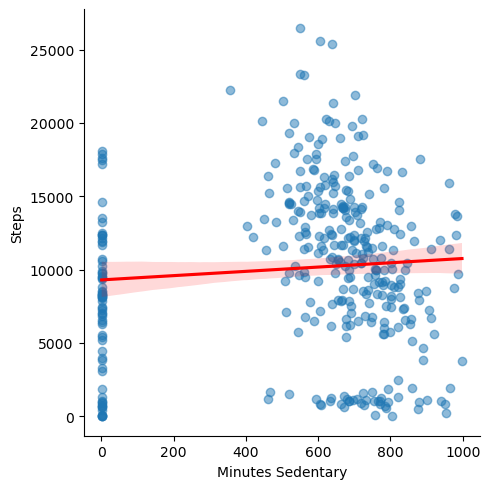

In [67]:
corr = fitbit["Minutes Sedentary"].corr(fitbit["Steps"])

sns.lmplot(x="Minutes Sedentary", y="Steps", data=fitbit, line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})

plt.show()

- Devuelve un valor cercano a 0 indicaría una falta de correlación lineal entre las dos variables.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [69]:
correlation_minsleep = fitbit["MinutesOfSleep"].corr(fitbit["Steps"])
correlation_minsleep

0.13098565950836386

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

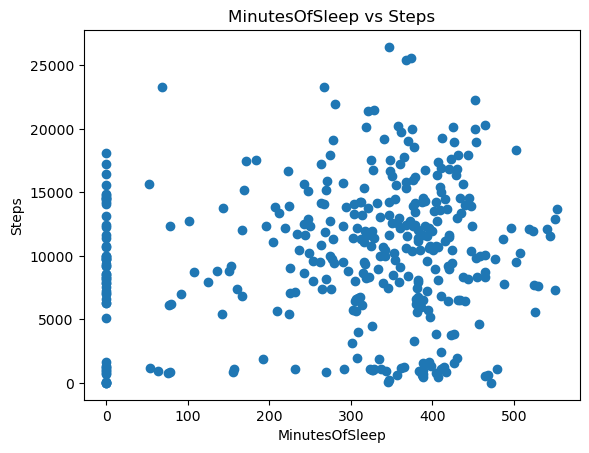

In [70]:
plt.scatter(fitbit["MinutesOfSleep"], fitbit["Steps"])
plt.title("MinutesOfSleep vs Steps")
plt.xlabel("MinutesOfSleep")
plt.ylabel("Steps")
plt.show()

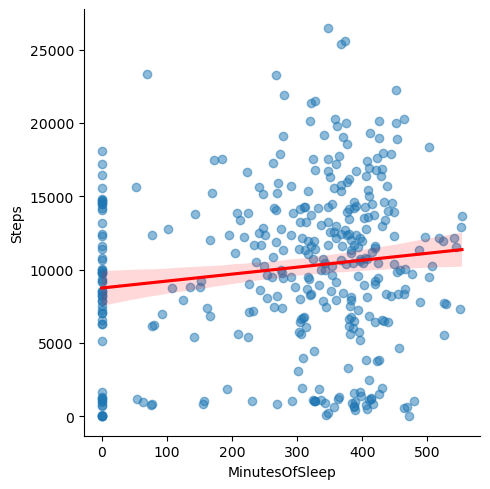

In [72]:
sns.lmplot(x="MinutesOfSleep", y="Steps", data=fitbit, line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})

plt.show()

Un valor de correlación cercano a 0 indica que no hay una relación lineal fuerte entre las dos variables. En este caso, el valor de correlación (0.131) es relativamente cercano a 0, lo que sugiere que no existe una correlación lineal fuerte entre la cantidad de minutos de sueño y el número de pasos.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [73]:
column = ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
subset = fitbit[column]

In [75]:
cor_fit = subset.corr()

cor_fit 

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [81]:
highly_correlated = cor_fit["Steps"]

highly_correlated = highly_correlated.sort_values(ascending=False)

highly_correlated

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [84]:
time_grades = pd.read_csv('Time_Grades.csv')

time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

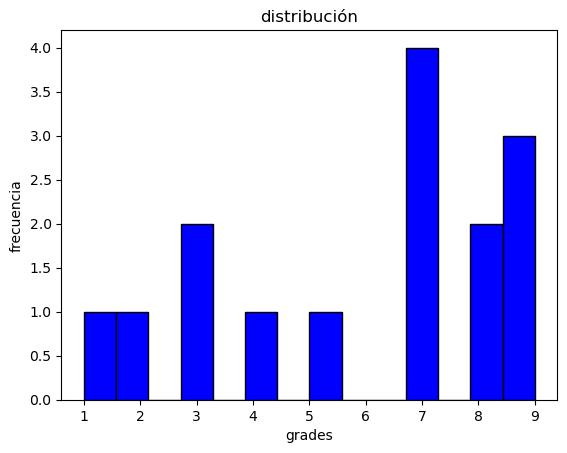

In [89]:
plt.hist(time_grades["Grade"], bins=14, color='blue', edgecolor='black')
plt.title("distribución")
plt.xlabel("grades")
plt.ylabel("frecuencia")

plt.show()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [90]:
import scipy.stats as st

In [94]:
pearson = st.pearsonr(time_grades["Study time"], time_grades["Grade"])

pearson

PearsonRResult(statistic=0.7980456073578858, pvalue=0.0003627635256342715)

- El valor de la estadística de correlación de Pearson es 0.798, lo que indica una correlación positiva fuerte. Este valor positivo cercano a 1 sugiere que a medida que aumenta el tiempo de estudio, las calificaciones tienden a aumentar. 
- Por tanto, sí existe una relación positiva significativa entre el tiempo de estudio y las calificaciones.

In [97]:
spearman = st.spearmanr(time_grades["Study time"], time_grades["Grade"])

spearman

SignificanceResult(statistic=0.819658753036942, pvalue=0.00018377469445788485)

- El valor de la estadística de correlación de Spearman es 0.820, lo que indica una correlación positiva fuerte. Este valor positivo cercano a 1 sugiere que a medida que aumenta el tiempo de estudio, las calificaciones tienden a aumentar. 
- Por tanto, sí existe una relación positiva significativa entre el tiempo de estudio y las calificaciones.

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

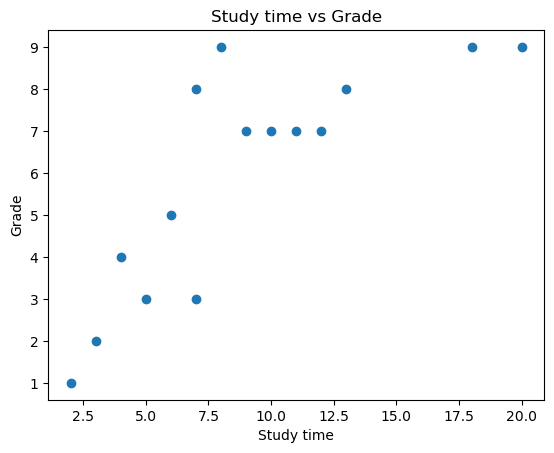

In [98]:
import matplotlib.pyplot as plt

plt.scatter(time_grades["Study time"], time_grades["Grade"])
plt.title("Study time vs Grade")
plt.xlabel("Study time")
plt.ylabel("Grade")
plt.show()

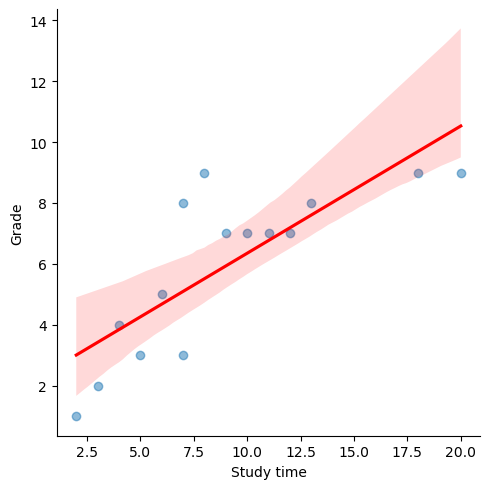

In [101]:
sns.lmplot(x="Study time", y="Grade", data = time_grades, line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})

plt.show()

- La correlación es positiva y significativa, lo que sugiere una relación positiva.
- Se observa que a medida que aumenta el tiempo de estudio, las calificaciones tienden a ser más altas en el gráfico de dispersión.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

El coeficiente de correlación de **Pearson** y el coeficiente de correlación de **Spearman** son dos medidas utilizadas para evaluar la relación entre dos variables en un conjunto de datos. Sin embargo, difieren en la forma en que evalúan la correlación y las condiciones bajo las cuales son más apropiados.

- **Pearson**: Existen varios coeficientes de correlación, el más habitual es la correlación de Pearson. La correlación de Pearson evalúa la relación lineal entre dos variables continuas. 
   - La correlación de Pearson evalúa la relación lineal entre dos variables. Es adecuada cuando se asume que la relación entre las variables es aproximadamente lineal.
   - El coeficiente de correlación de Pearson varía entre -1 y 1. Un valor de 1 indica una correlación lineal positiva perfecta, un valor de -1 indica una correlación lineal negativa perfecta, y un valor de 0 indica la falta de correlación lineal.
    - La correlación de Pearson es sensible a valores atípicos y puede verse afectada por datos atípicos en el conjunto de datos.
    - Se basa en las desviaciones con respecto a las medias de las variables y se calcula mediante fórmulas matemáticas.

- **Spearman**: También tenemos la correlación de Spearman. 
   - Monotonía: La correlación de Spearman evalúa la relación monotónica (no necesariamente lineal) entre dos variables. Es adecuada cuando no se puede asumir una relación lineal entre las variables.
   - Rango de valores: El coeficiente de correlación de Spearman varía entre -1 y 1. Funciona de manera similar al coeficiente de Pearson en términos de interpretación.
   - La correlación de Spearman es menos sensible a valores atípicos, ya que se basa en el ordenamiento de los datos y no en los valores exactos.
   - Ordenamiento de los valores en lugar de sus valores exactos. Es adecuada para datos ordinales o categóricos, así como para datos numéricos.